<a href="https://colab.research.google.com/github/leidysguerrero120/Trabajo-Analitica-3---RRHH/blob/main/b_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import sqlite3
from datetime import datetime


In [21]:
import pandas as pd
import sqlite3

###Cargamos los datos en DataFrames de pandas
datos_generales = pd.read_csv('/content/drive/MyDrive/leidys.guerrero@udea.edu.co 2024-09-12 19:06/TRABAJO HR/general_data.csv')
encuesta_empleados = pd.read_csv('/content/drive/MyDrive/leidys.guerrero@udea.edu.co 2024-09-12 19:06/TRABAJO HR/employee_survey_data.csv')
encuesta_gerentes = pd.read_csv('/content/drive/MyDrive/leidys.guerrero@udea.edu.co 2024-09-12 19:06/TRABAJO HR/manager_survey.csv')
informacion_jubilacion = pd.read_csv('/content/drive/MyDrive/leidys.guerrero@udea.edu.co 2024-09-12 19:06/TRABAJO HR/retirement_info.csv')

###Conexión a la base de datos SQLite
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

###Creamos las tablas en SQLite
cursor.execute('''
CREATE TABLE datos_generales (
    Edad INTEGER,
    ViajeNegocios TEXT,
    Departamento TEXT,
    DistanciaDesdeCasa INTEGER,
    Educacion INTEGER,
    CampoEducacion TEXT,
    ConteoEmpleados INTEGER,
    ID_Empleado INTEGER PRIMARY KEY,
    Genero TEXT,
    NivelTrabajo INTEGER,
    RolTrabajo TEXT,
    EstadoCivil TEXT,
    IngresoMensual INTEGER,
    NumeroEmpresasTrabajadas INTEGER,
    MayorDe18 TEXT,
    AumentoSalarialPorcentaje INTEGER,
    HorasEstandar INTEGER,
    NivelOpcionesAcciones INTEGER,
    AñosTotalesTrabajando INTEGER,
    VecesEntrenamientoUltimoAño INTEGER,
    AñosEnLaEmpresa INTEGER,
    AñosDesdeUltimaPromocion INTEGER,
    AñosConGerenteActual INTEGER,
    FechaInfo TEXT
)
''')

cursor.execute('''
CREATE TABLE encuesta_empleados (
    ID_Empleado INTEGER PRIMARY KEY,
    SatisfaccionEntorno INTEGER,
    SatisfaccionTrabajo INTEGER,
    EquilibrioVidaTrabajo INTEGER,
    FechaEncuesta TEXT
)
''')

cursor.execute('''
CREATE TABLE encuesta_gerentes (
    ID_Empleado INTEGER PRIMARY KEY,
    InvolucramientoTrabajo INTEGER,
    CalificacionRendimiento INTEGER,
    FechaEncuesta TEXT
)
''')

###Insertamos los datos en las tablas de SQLite
datos_generales.to_sql('datos_generales', conn, if_exists='replace', index=False)
encuesta_empleados.to_sql('encuesta_empleados', conn, if_exists='replace', index=False)
encuesta_gerentes.to_sql('encuesta_gerentes', conn, if_exists='replace', index=False)
informacion_jubilacion.to_sql('informacion_jubilacion', conn, if_exists='replace', index=False)


711

In [24]:
cursor.execute('PRAGMA table_info(datos_generales)')
columnas_datos_generales = cursor.fetchall()
print('Columnas en datos_generales:', columnas_datos_generales)


Columnas en datos_generales: [(0, 'Age', 'INTEGER', 0, None, 0), (1, 'BusinessTravel', 'TEXT', 0, None, 0), (2, 'Department', 'TEXT', 0, None, 0), (3, 'DistanceFromHome', 'INTEGER', 0, None, 0), (4, 'Education', 'INTEGER', 0, None, 0), (5, 'EducationField', 'TEXT', 0, None, 0), (6, 'EmployeeCount', 'INTEGER', 0, None, 0), (7, 'EmployeeID', 'INTEGER', 0, None, 0), (8, 'Gender', 'TEXT', 0, None, 0), (9, 'JobLevel', 'INTEGER', 0, None, 0), (10, 'JobRole', 'TEXT', 0, None, 0), (11, 'MaritalStatus', 'TEXT', 0, None, 0), (12, 'MonthlyIncome', 'INTEGER', 0, None, 0), (13, 'NumCompaniesWorked', 'REAL', 0, None, 0), (14, 'Over18', 'TEXT', 0, None, 0), (15, 'PercentSalaryHike', 'INTEGER', 0, None, 0), (16, 'StandardHours', 'INTEGER', 0, None, 0), (17, 'StockOptionLevel', 'INTEGER', 0, None, 0), (18, 'TotalWorkingYears', 'REAL', 0, None, 0), (19, 'TrainingTimesLastYear', 'INTEGER', 0, None, 0), (20, 'YearsAtCompany', 'INTEGER', 0, None, 0), (21, 'YearsSinceLastPromotion', 'INTEGER', 0, None, 0), 

In [25]:
cursor.execute('''
UPDATE datos_generales SET InfoDate = substr(InfoDate, 1, 10)
''')

cursor.execute('''
UPDATE encuesta_empleados SET DateSurvey = substr(DateSurvey, 1, 10)
''')

cursor.execute('''
UPDATE encuesta_gerentes SET SurveyDate = substr(SurveyDate, 1, 10)
''')


In [28]:
cursor.execute('PRAGMA table_info(datos_generales)')
columnas_datos_generales = cursor.fetchall()
print('Columnas en datos_generales:', columnas_datos_generales)


Columnas en datos_generales: [(0, 'Age', 'INTEGER', 0, None, 0), (1, 'BusinessTravel', 'TEXT', 0, None, 0), (2, 'Department', 'TEXT', 0, None, 0), (3, 'DistanceFromHome', 'INTEGER', 0, None, 0), (4, 'Education', 'INTEGER', 0, None, 0), (5, 'EducationField', 'TEXT', 0, None, 0), (6, 'EmployeeCount', 'INTEGER', 0, None, 0), (7, 'EmployeeID', 'INTEGER', 0, None, 0), (8, 'Gender', 'TEXT', 0, None, 0), (9, 'JobLevel', 'INTEGER', 0, None, 0), (10, 'JobRole', 'TEXT', 0, None, 0), (11, 'MaritalStatus', 'TEXT', 0, None, 0), (12, 'MonthlyIncome', 'INTEGER', 0, None, 0), (13, 'NumCompaniesWorked', 'REAL', 0, None, 0), (14, 'Over18', 'TEXT', 0, None, 0), (15, 'PercentSalaryHike', 'INTEGER', 0, None, 0), (16, 'StandardHours', 'INTEGER', 0, None, 0), (17, 'StockOptionLevel', 'INTEGER', 0, None, 0), (18, 'TotalWorkingYears', 'REAL', 0, None, 0), (19, 'TrainingTimesLastYear', 'INTEGER', 0, None, 0), (20, 'YearsAtCompany', 'INTEGER', 0, None, 0), (21, 'YearsSinceLastPromotion', 'INTEGER', 0, None, 0), 

In [49]:
datos_generales_2015 = pd.read_sql_query("SELECT * FROM datos_generales WHERE substr(InfoDate, 1, 4) = '2015'", conn)
datos_generales_2016 = pd.read_sql_query("SELECT * FROM datos_generales WHERE substr(InfoDate, 1, 4) = '2016'", conn)

encuesta_empleados_2015 = pd.read_sql_query("SELECT * FROM encuesta_empleados WHERE substr(DateSurvey, 1, 4) = '2015'", conn)
encuesta_empleados_2016 = pd.read_sql_query("SELECT * FROM encuesta_empleados WHERE substr(DateSurvey, 1, 4) = '2016'", conn)

encuesta_gerentes_2015 = pd.read_sql_query("SELECT * FROM encuesta_gerentes WHERE substr(SurveyDate, 1, 4) = '2015'", conn)
encuesta_gerentes_2016 = pd.read_sql_query("SELECT * FROM encuesta_gerentes WHERE substr(SurveyDate, 1, 4) = '2016'", conn)


In [42]:
###Unimos las tablas de 2015
total_2015 = pd.merge(pd.merge(datos_generales_2015, encuesta_empleados_2015, on='EmployeeID', how='left'),
                      encuesta_gerentes_2015, on='EmployeeID', how='left')

###Unimos las tablas de 2016
total_2016 = pd.merge(pd.merge(datos_generales_2016, encuesta_empleados_2016, on='EmployeeID', how='left'),
                      encuesta_gerentes_2016, on='EmployeeID', how='left')

###Concatenamos los datos de 2015 y 2016
merged_total = pd.concat([total_2015, total_2016], ignore_index=True).drop_duplicates()


In [53]:
###Verificamos los duplicados
cantidad_duplicados = tabla_final_limpia.duplicated(subset='EmployeeID').sum()
print(f'Número de duplicados: {cantidad_duplicados}')

###Mostramos los primeros registros
primeros_registros = tabla_final_limpia.head(10)
print(primeros_registros)


Número de duplicados: 3760
   EmployeeID    InfoDate  DateSurvey  SurveyDate
0           1  2015-12-31  2015-12-31  2015-12-31
1           2  2015-12-31  2015-12-31  2015-12-31
2           3  2015-12-31  2015-12-31  2015-12-31
3           4  2015-12-31  2015-12-31  2015-12-31
4           5  2015-12-31  2015-12-31  2015-12-31
5           6  2015-12-31  2015-12-31  2015-12-31
6           7  2015-12-31  2015-12-31  2015-12-31
7           8  2015-12-31  2015-12-31  2015-12-31
8           9  2015-12-31  2015-12-31  2015-12-31
9          10  2015-12-31  2015-12-31  2015-12-31


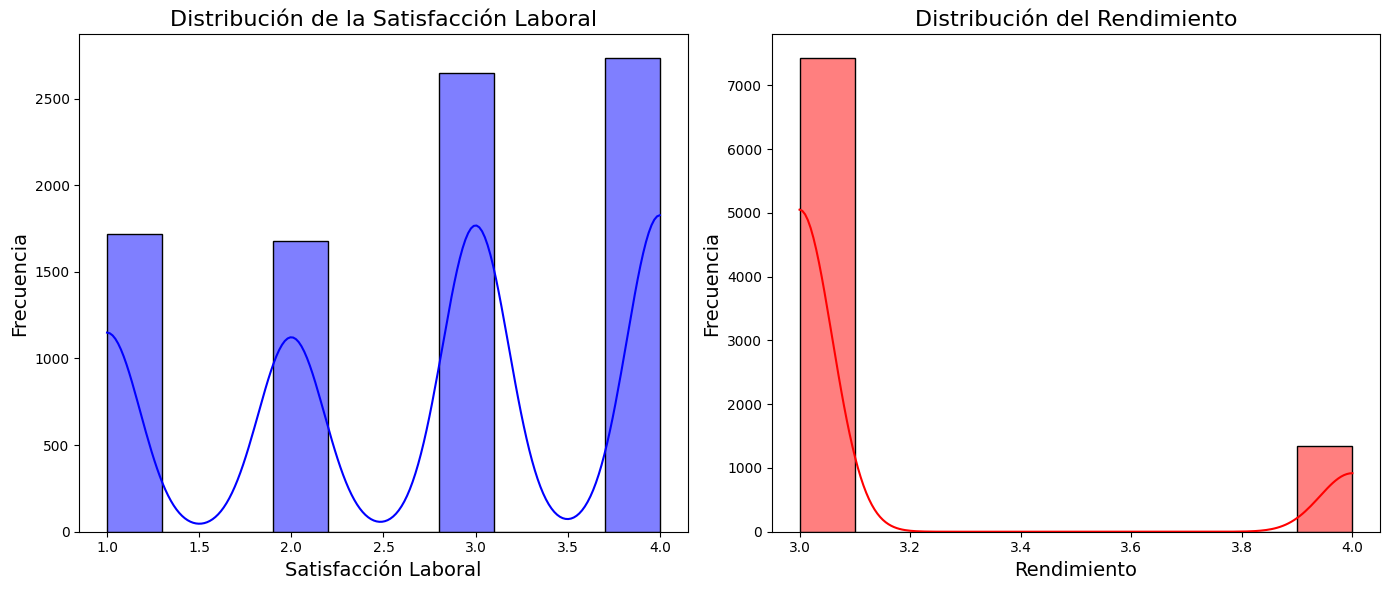

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = final_table[['JobSatisfaction', 'PerformanceRating', 'InfoDate']].dropna()

###Convertimos la fecha a datetime para extraer el año
df['Year'] = pd.to_datetime(df['InfoDate']).dt.year

plt.figure(figsize=(14, 6))

###Histograma de Satisfacción Laboral
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], bins=10, kde=True, color='b')
plt.title('Distribución de la Satisfacción Laboral', fontsize=16)
plt.xlabel('Satisfacción Laboral', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

###Histograma de Rendimiento
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], bins=10, kde=True, color='r')
plt.title('Distribución del Rendimiento', fontsize=16)
plt.xlabel('Rendimiento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.tight_layout()
plt.show()
